In [303]:
import numpy as np

import matplotlib.pyplot as plt


In [304]:
x_data = np.array([1,2,3,4,5]).reshape(5,1)
t_data = np.array([3,5,7,9,11]).reshape(5,1)
print(x_data, t_data)
print(x_data.shape, t_data.shape)

[[1]
 [2]
 [3]
 [4]
 [5]] [[ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]]
(5, 1) (5, 1)


In [305]:
w = np.random.rand(1,1)
b = np.random.rand(1)
print(w, b)

[[0.78425046]] [0.90881081]


In [306]:
def loss_func(x, t):
    y = np.dot(x, w) + b 
    return (np.sum((y - t) ** 2))/ (len(x))

In [307]:
def numerical_derivative(f, x):
    delta_x = 1e-5
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + delta_x
        fx1 = f(x)
        x[idx] = tmp_val - delta_x
        fx2 = f(x)

        grad[idx] = (fx1 - fx2) / (2 * delta_x)

        x[idx] = tmp_val  # restore original value
        it.iternext()
    return grad


In [308]:
def predict(x):
    return np.dot(x, w) + b

In [309]:
# Training loop

learning_rate = 1e-2
cost_list = []
f = lambda x : loss_func(x_data, t_data)
print("Initial loss:", loss_func(x_data, t_data), "w:", w, "b:", b)
# Gradient descent
for step in range(5000):
    w -= learning_rate * numerical_derivative(f, w)
    b -= learning_rate * numerical_derivative(f, b)

    cost = loss_func(x_data, t_data)
    cost_list.append([step, cost])

    if step % 10 == 0:
        print("Step:", step, "Loss:", cost, "w:", w, "b:", b)   



Initial loss: 16.932011133013667 w: [[0.78425046]] b: [0.90881081]
Step: 0 Loss: 9.964467974650407 w: [[1.05718671]] b: [0.96720339]
Step: 10 Loss: 0.05411564673271938 w: [[1.89351382]] b: [1.14215364]
Step: 20 Loss: 0.004387255542156283 w: [[1.95382241]] b: [1.14960146]
Step: 30 Loss: 0.0038543872910119146 w: [[1.95938137]] b: [1.14540671]
Step: 40 Loss: 0.003596117859753903 w: [[1.96103664]] b: [1.14055083]
Step: 50 Loss: 0.0033569662529768325 w: [[1.96237401]] b: [1.13580254]
Step: 60 Loss: 0.003133775855282462 w: [[1.96364769]] b: [1.13121082]
Step: 70 Loss: 0.0029254279874197132 w: [[1.96487701]] b: [1.12677409]
Step: 80 Loss: 0.0027309322866124635 w: [[1.96606466]] b: [1.12248736]
Step: 90 Loss: 0.002549367557145962 w: [[1.96721215]] b: [1.11834558]
Step: 100 Loss: 0.0023798740731621705 w: [[1.96832084]] b: [1.11434384]
Step: 110 Loss: 0.0022216492825522594 w: [[1.96939203]] b: [1.11047743]
Step: 120 Loss: 0.002073943991549565 w: [[1.97042701]] b: [1.10674175]
Step: 130 Loss: 0.0

In [310]:
predicted = predict(np.array([[6], [7], [8]]))
print("Predicted values for 6, 7, 8:", predicted.flatten())

Predicted values for 6, 7, 8: [13.         14.99999999 16.99999999]


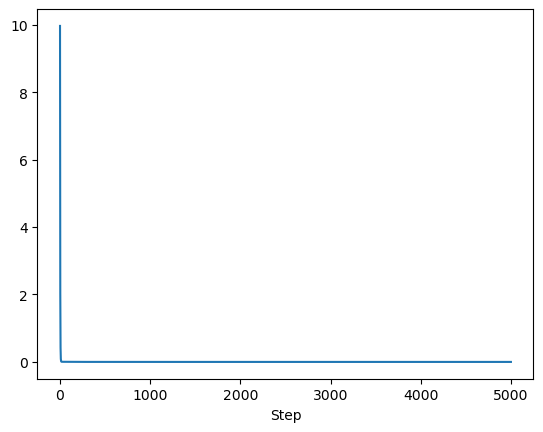

In [311]:
plt.plot(np.array(cost_list)[:,0], np.array(cost_list)[:,1])
plt.xlabel('Step')
plt.show()

변수가 여러개일때 구해보기

In [359]:
x_data = np.array( [[73., 80., 75.],
                    [93., 88., 93.],
                    [89., 91., 90.],
                    [96., 98., 100.],
                    [73., 66., 70.],
                    [53., 65., 66.],
                    [69., 70., 73.],
                    [47., 56., 60.],
                    [87., 79., 90.],
                    [66., 70., 68.]
                    ])
t_data = np.array([[152], [185], [180], [196], [142], [127], [135], [105], [175], [120]])

In [346]:
w = np.random.rand(3, 1)
b = np.random.rand(1)
print("Initial w:", w, "b:", b)

Initial w: [[0.82296314]
 [0.21489748]
 [0.72883032]] b: [0.81315378]


In [358]:
# Training loop
learning_rate = 1e-6
cost_list = []
f = lambda x : loss_func(x_data, t_data)
print("Initial loss:", loss_func(x_data, t_data), "w:", w, "b:", b)
# Gradient descent
for step in range(50000):
    w -= learning_rate * numerical_derivative(f, w)
    b -= learning_rate * numerical_derivative(f, b)

    cost = loss_func(x_data, t_data)
    cost_list.append([step, cost])

    if step % 10 == 0:
        print("Step:", step, "Loss:", cost, "w:", w, "b:", b)   



Initial loss: 30.317488320713437 w: [[0.75012475]
 [0.10909612]
 [1.10870268]] b: [0.67875803]
Step: 0 Loss: 30.317487940181444 w: [[0.7501247 ]
 [0.10909603]
 [1.10870283]] b: [0.67875744]
Step: 10 Loss: 30.317484134908206 w: [[0.75012419]
 [0.10909512]
 [1.10870428]] b: [0.67875154]
Step: 20 Loss: 30.317480329719853 w: [[0.75012368]
 [0.10909421]
 [1.10870572]] b: [0.67874563]
Step: 30 Loss: 30.317476524616325 w: [[0.75012317]
 [0.1090933 ]
 [1.10870717]] b: [0.67873973]
Step: 40 Loss: 30.317472719597514 w: [[0.75012266]
 [0.10909239]
 [1.10870861]] b: [0.67873382]
Step: 50 Loss: 30.31746891466352 w: [[0.75012215]
 [0.10909148]
 [1.10871006]] b: [0.67872792]
Step: 60 Loss: 30.317465109814208 w: [[0.75012163]
 [0.10909057]
 [1.10871151]] b: [0.67872201]
Step: 70 Loss: 30.31746130504958 w: [[0.75012112]
 [0.10908966]
 [1.10871295]] b: [0.67871611]
Step: 80 Loss: 30.3174575003698 w: [[0.75012061]
 [0.10908875]
 [1.1087144 ]] b: [0.6787102]
Step: 90 Loss: 30.317453695774578 w: [[0.750120

In [363]:
predicted = predict(np.array([[73.,80.,75.],
                              [93.,88.,93.]]))
print(predicted.flatten())

[147.29132701 183.15440772]


In [367]:
import pandas as pd
df = pd.read_csv('data/data-01-test-score.csv', header=None)
df

,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [368]:
df.values

array([[ 73,  80,  75, 152],
       [ 93,  88,  93, 185],
       [ 89,  91,  90, 180],
       [ 96,  98, 100, 196],
       [ 73,  66,  70, 142],
       [ 53,  46,  55, 101],
       [ 69,  74,  77, 149],
       [ 47,  56,  60, 115],
       [ 87,  79,  90, 175],
       [ 79,  70,  88, 164],
       [ 69,  70,  73, 141],
       [ 70,  65,  74, 141],
       [ 93,  95,  91, 184],
       [ 79,  80,  73, 152],
       [ 70,  73,  78, 148],
       [ 93,  89,  96, 192],
       [ 78,  75,  68, 147],
       [ 81,  90,  93, 183],
       [ 88,  92,  86, 177],
       [ 78,  83,  77, 159],
       [ 82,  86,  90, 177],
       [ 86,  82,  89, 175],
       [ 78,  83,  85, 175],
       [ 76,  83,  71, 149],
       [ 96,  93,  95, 192]], dtype=int64)

In [372]:
x_data = df.values[:,:-1]
print(x_data)
t_data = df.values[:,-1].reshape(-1, 1)
print(t_data)

[[ 73  80  75]
 [ 93  88  93]
 [ 89  91  90]
 [ 96  98 100]
 [ 73  66  70]
 [ 53  46  55]
 [ 69  74  77]
 [ 47  56  60]
 [ 87  79  90]
 [ 79  70  88]
 [ 69  70  73]
 [ 70  65  74]
 [ 93  95  91]
 [ 79  80  73]
 [ 70  73  78]
 [ 93  89  96]
 [ 78  75  68]
 [ 81  90  93]
 [ 88  92  86]
 [ 78  83  77]
 [ 82  86  90]
 [ 86  82  89]
 [ 78  83  85]
 [ 76  83  71]
 [ 96  93  95]]
[[152]
 [185]
 [180]
 [196]
 [142]
 [101]
 [149]
 [115]
 [175]
 [164]
 [141]
 [141]
 [184]
 [152]
 [148]
 [192]
 [147]
 [183]
 [177]
 [159]
 [177]
 [175]
 [175]
 [149]
 [192]]


In [373]:
w = np.random.rand(3, 1)
b = np.random.rand(1)
print("Initial w:", w, "b:", b)

Initial w: [[0.39760113]
 [0.16855602]
 [0.80799092]] b: [0.69366759]


In [ ]:
# Training loop
learning_rate = 1e-5
cost_list = []
f = lambda x : loss_func(x_data, t_data)
print("Initial loss:", loss_func(x_data, t_data), "w:", w, "b:", b)
# Gradient descent
for step in range(200000):
    w -= learning_rate * numerical_derivative(f, w)
    b -= learning_rate * numerical_derivative(f, b)

    cost = loss_func(x_data, t_data)
    cost_list.append([step, cost])

    if step % 10 == 0:
        print("Step:", step, "Loss:", cost, "w:", w, "b:", b)   



Initial loss: 2637.7091509869742 w: [[0.39760113]
 [0.16855602]
 [0.80799092]] b: [0.69366759]
Step: 0 Loss: 979.93144039249 w: [[0.47949197]
 [0.25100083]
 [0.89233827]] b: [0.69428339]
Step: 10 Loss: 7.454745036477243 w: [[0.60513304]
 [0.37836506]
 [1.02246979]] b: [0.69521835]
Step: 20 Loss: 7.402370639516342 w: [[0.60538342]
 [0.37964585]
 [1.02357795]] b: [0.69520862]
Step: 30 Loss: 7.396455473097825 w: [[0.60476891]
 [0.3800543 ]
 [1.02379421]] b: [0.69519234]
Step: 40 Loss: 7.3905723921052004 w: [[0.60414996]
 [0.38045558]
 [1.02400393]] b: [0.69517602]
Step: 50 Loss: 7.384719022727743 w: [[0.6035325 ]
 [0.38085569]
 [1.02421323]] b: [0.69515969]
Step: 60 Loss: 7.378895213147344 w: [[0.60291657]
 [0.38125465]
 [1.02442215]] b: [0.69514335]
Step: 70 Loss: 7.373100812473216 w: [[0.60230218]
 [0.38165249]
 [1.02463068]] b: [0.695127]
Step: 80 Loss: 7.367335670597472 w: [[0.6016893 ]
 [0.3820492 ]
 [1.02483884]] b: [0.69511065]
Step: 90 Loss: 7.361599638191558 w: [[0.60107795]
 [0.

In [375]:
predicted = predict(np.array([[73.,80.,75.],
                              [93.,88.,93.]]))
print(predicted.flatten())

[152.97098006 184.55959486]


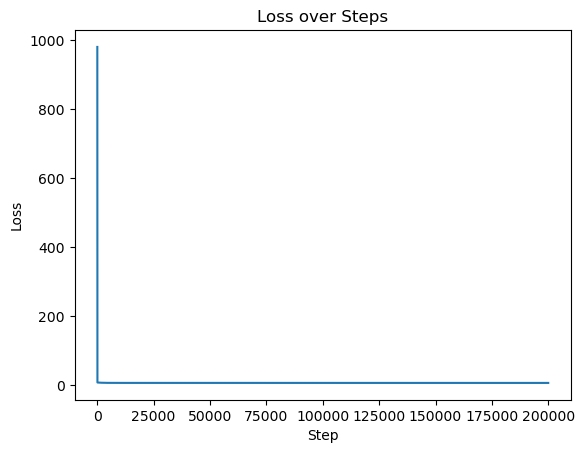

In [377]:
np.array(cost_list).shape
cost_list = np.array(cost_list)
plt.plot(cost_list[:,0], cost_list[:,1])
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Loss over Steps')
plt.show()